<a href="https://colab.research.google.com/github/intimanjunath/Clustering/blob/main/d_DB_Scan_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Install necessary libraries
!pip install pycaret kaleido
!pip install chromium

In [13]:
# Update and install chromium for visualization support
!apt-get update
!apt-get install -y chromium-browser

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,616 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [14]:
# Import necessary libraries
from pycaret.clustering import *
from pycaret.datasets import get_data
import pandas as pd

In [17]:
# Load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
data = iris['data']
data['target'] = iris['target']

In [18]:
# Display the first few rows of the dataset
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [19]:
# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [20]:
# Display the shape of the dataset
print(f"Dataset shape: {data.shape}")

Dataset shape: (150, 5)


In [22]:
# Initialize the PyCaret clustering setup
exp_clu = setup(data, normalize=True, ignore_features=['target'], session_id=113)

,Description,Value
0,Session id,113
1,Original data shape,"(150, 5)"
2,Transformed data shape,"(150, 4)"
3,Ignore features,1
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


In [23]:
# Create a DBSCAN model
dbscan_model = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3565,84.5103,7.1241,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [24]:
# Print the DBSCAN model
print(dbscan_model)

DBSCAN(n_jobs=-1)


In [25]:
# Plot the DBSCAN clusters
plot_model(dbscan_model, plot='cluster')

In [26]:
# Create a KMeans model
kmeans_model = create_model('kmeans')


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4151,206.2286,0.9224,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
#Print the KMeans model
print(kmeans_model)

KMeans(n_clusters=4, random_state=113)


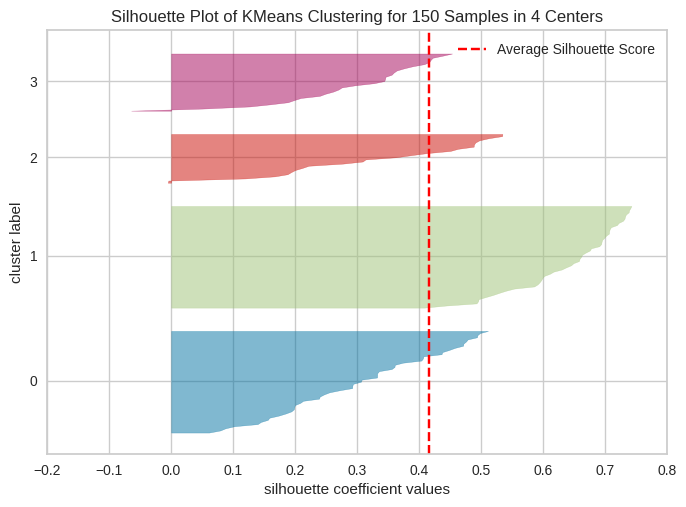

In [31]:
# Plot the silhouette plot for KMeans
plot_model(kmeans_model, plot='silhouette')

In [32]:
# Evaluate the DBSCAN model
evaluate_model(dbscan_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
# Perform clustering on unseen data
data_sampled = data.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data_sampled.index).reset_index(drop=True)

In [34]:
print('Data for Modeling: ' + str(data_sampled.shape))
print('Unseen Data for Predictions: ' + str(data_unseen.shape))

Data for Modeling: (142, 5)
Unseen Data for Predictions: (8, 5)


In [35]:
# Re-setup for clustering
exp_clu_new = setup(data_sampled, normalize=True, ignore_features=['target'], session_id=113)

,Description,Value
0,Session id,113
1,Original data shape,"(142, 5)"
2,Transformed data shape,"(142, 4)"
3,Ignore features,1
4,Numeric features,4
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


In [36]:
# Create and assign clusters using KMeans
kmeans_new = create_model('kmeans')
kmean_results = assign_model(kmeans_new)
print(kmean_results.head())

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3896,197.9935,0.8669,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.8               2.7                3.9               1.2   
1                5.7               2.8                4.5               1.3   
2                7.7               3.0                6.1               2.3   
3                5.8               2.6                4.0               1.2   
4                7.0               3.2                4.7               1.4   

     Cluster  
0  Cluster 0  
1  Cluster 0  
2  Cluster 2  
3  Cluster 0  
4  Cluster 2  


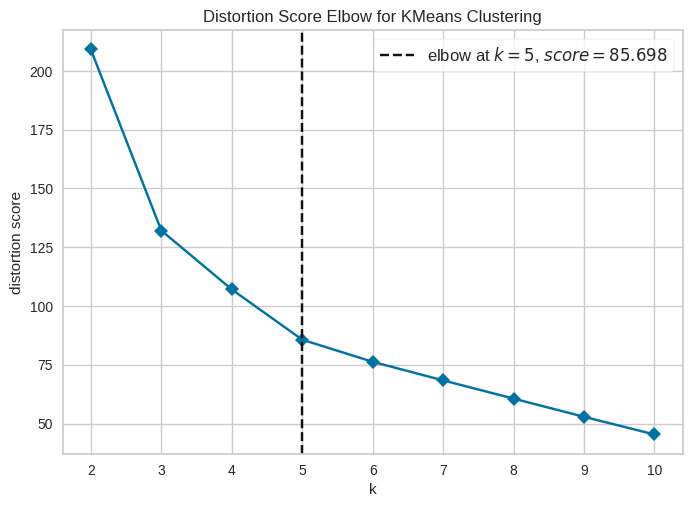

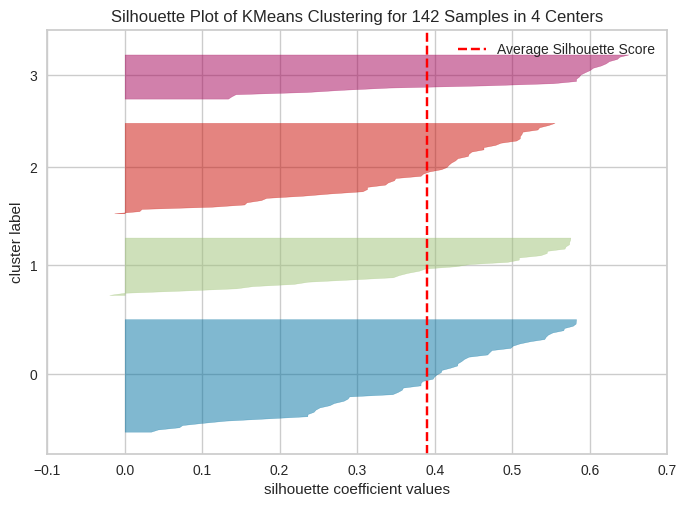

In [37]:

# Plot different cluster-related visualizations
plot_model(kmeans_new)
plot_model(kmeans_new, plot='elbow')
plot_model(kmeans_new, plot='silhouette')
plot_model(kmeans_new, plot='distribution')

In [58]:
#Save the trained KMeans model
save_model(kmeans_new, 'Final_KMeans_Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['sepal length (cm)',
                                              'sepal width (cm)',
                                              'petal length (cm)',
                                              'petal width (cm)', 'target'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', KMeans(n_clusters=4, random_state=123))]),
 'Final_KMeans_Model.pkl')

In [59]:
#Load the saved model
kmeans_loaded = load_model('Final_KMeans_Model')

Transformation Pipeline and Model Successfully Loaded


In [60]:
#Convert unseen data to a clean Numpy array
import numpy as np

data_unseen_numeric = data_unseen.select_dtypes(include=['number']).astype('float64')
data_unseen_array = np.array(data_unseen_numeric, dtype=np.float64)

In [68]:
from sklearn.cluster import KMeans

# Step 1: Drop the 'target' column from both training and unseen datasets
data_sampled_numeric = data_sampled.drop(columns=['target'], errors='ignore')
data_unseen_numeric = data_unseen.drop(columns=['target'], errors='ignore')

# Step 2: Rebuild the KMeans model
kmeans_manual = KMeans(n_clusters=kmeans_new.n_clusters, random_state=113)
kmeans_manual.fit(data_sampled_numeric)

# Step 3: Perform prediction on unseen data
try:
    cluster_labels = kmeans_manual.predict(data_unseen_numeric)
    print("Cluster Labels for Unseen Data:")
    print(cluster_labels)
except Exception as e:
    print("Error during prediction:", e)

# Step 4: Add cluster labels to unseen data
data_unseen['Cluster'] = cluster_labels

# Display unseen data with clusters
print(data_unseen.head())

# Save unseen data with clusters to CSV
data_unseen.to_csv('Unseen_Data_With_Clusters.csv', index=False)
print("Predictions saved to 'Unseen_Data_With_Clusters.csv'")

Cluster Labels for Unseen Data:
[0 2 2 2 0 0 2 0]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.8               2.7                5.1               1.9   
1                6.8               3.2                5.9               2.3   
2                6.7               3.3                5.7               2.5   
3                6.7               3.0                5.2               2.3   
4                6.3               2.5                5.0               1.9   

   target  Cluster  
0       2        0  
1       2        2  
2       2        2  
3       2        2  
4       2        0  
Predictions saved to 'Unseen_Data_With_Clusters.csv'


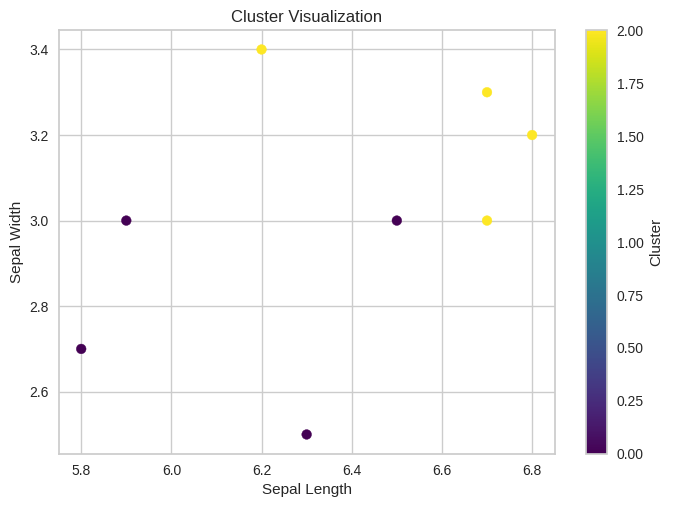

In [69]:
import matplotlib.pyplot as plt

plt.scatter(data_unseen['sepal length (cm)'], data_unseen['sepal width (cm)'], c=data_unseen['Cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster')
plt.show()
